# 지금까지 만든 자료들을 가지고 시각화를 한다
## 데이터 출처 : 대중교통 빅데이터 시스템 (https://www.stcis.go.kr/wps/main.do)

In [50]:
import mysql.connector

In [51]:
conn = mysql.connector.connect(
    host = "database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "eda_team",
    password = "123456",
    database = "eda_project"
)

In [52]:
cursor = conn.cursor(dictionary=True, buffered=True)

In [53]:
cursor.execute("select * from method_traffic")

In [54]:
data = cursor.fetchall()

In [55]:
import pandas as pd

raw_data = pd.DataFrame(data)

## 시간별 데이터를 합쳐서 오전, 오후 데이터를 만든다

In [56]:
raw_data["오전발생량"] = raw_data["4시발생량"]+raw_data["5시발생량"]+raw_data["6시발생량"]+raw_data["7시발생량"]+raw_data["8시발생량"]+raw_data["9시발생량"]+raw_data["10시발생량"]+raw_data["11시발생량"]+raw_data["24시발생량"]+raw_data["1시발생량"]+raw_data["2시발생량"]+raw_data["3시발생량"]
raw_data["오후발생량"] = raw_data["12시발생량"]+raw_data["13시발생량"]+raw_data["14시발생량"]+raw_data["15시발생량"]+raw_data["16시발생량"]+raw_data["17시발생량"]+raw_data["18시발생량"]+raw_data["19시발생량"]+raw_data["20시발생량"]+raw_data["21시발생량"]+raw_data["22시발생량"]+raw_data["23시발생량"]

In [57]:
raw_data["오전도착량"] = raw_data["4시도착량"]+raw_data["5시도착량"]+raw_data["6시도착량"]+raw_data["7시도착량"]+raw_data["8시도착량"]+raw_data["9시도착량"]+raw_data["10시도착량"]+raw_data["11시도착량"]+raw_data["24시도착량"]+raw_data["1시도착량"]+raw_data["2시도착량"]+raw_data["3시도착량"]
raw_data["오후도착량"] = raw_data["12시도착량"]+raw_data["13시도착량"]+raw_data["14시도착량"]+raw_data["15시도착량"]+raw_data["16시도착량"]+raw_data["17시도착량"]+raw_data["18시도착량"]+raw_data["19시도착량"]+raw_data["20시도착량"]+raw_data["21시도착량"]+raw_data["22시도착량"]+raw_data["23시도착량"]

## 도착량(내림)과 발생량(탑승)의 차이로 유입량(외부지역에서 오는양)을 계산한다

In [58]:
raw_data["오전유입량"] = raw_data["오전도착량"] - raw_data["오전발생량"]
raw_data["오후유입량"] = raw_data["오후도착량"] - raw_data["오후발생량"]

In [59]:
sido_inout_pivot = pd.pivot_table(raw_data, index="시도",values=["오전유입량","오후유입량"],aggfunc='sum')
sido_inout_pivot /=2250
sido_inout_pivot

,오전유입량,오후유입량
시도,,
경기도,-383921.250667,314907.707111
서울특별시,197570.984889,-317690.417333
인천광역시,-87820.417333,53304.458667


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 시도별 오전,오후에 인구 유출,유입량 (하루 평균)

<Figure size 800x800 with 0 Axes>

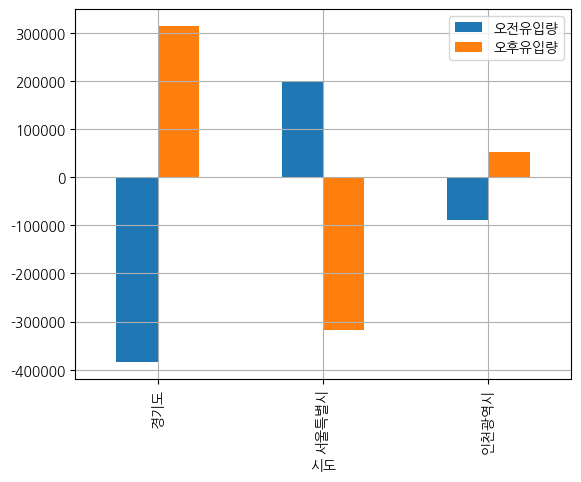

In [61]:
plt.figure(figsize=(8,8))
sido_inout_pivot.plot(kind="bar", grid=True)
plt.show()

### 경기도, 인천은 오전에 빠져나가서 오후에 돌아온다
### 서울은 오전에 들어오고 오후에 빠져나간다

In [62]:
gu_inout_pivot = pd.pivot_table(raw_data, index="시군구",values=["오전유입량","오후유입량"],aggfunc='sum')
gu_inout_pivot/=2250

## 오전에 가장 많이 유출되는 시군구 top10

<Figure size 1500x2000 with 0 Axes>

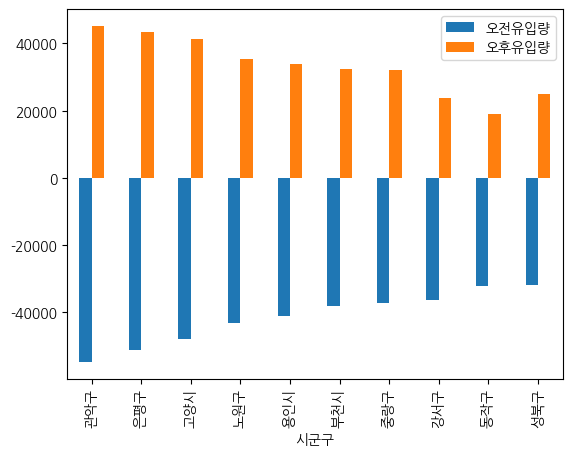

In [63]:
plt.figure(figsize=(15,20))
gu_inout_pivot.sort_values(by="오전유입량", ascending=True).head(10).plot(kind="bar")
plt.show()

## 의외로 빠져나가는 사람이 가장 많은 지역은 경기도가 아니라 관악구였다

## 오전에 가장 많이 유입되는 시군구 top 10

<Figure size 1500x2000 with 0 Axes>

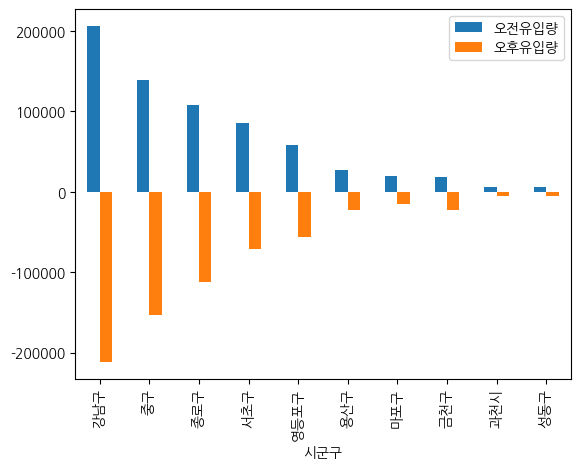

In [64]:
plt.figure(figsize=(15,20))
gu_inout_pivot.sort_values(by="오전유입량", ascending=False).head(10).plot(kind="bar")
plt.show()

## 강남구에 가장 사람들이 많이 몰린다

In [65]:
sido_use_pivot = pd.pivot_table(raw_data, index="시도",values="합계발생량", aggfunc='sum').sort_values(by="합계발생량", ascending=False)
sido_use_pivot /= 2250

## 하루평균 시도별 대중교통 이용수 (탑승기준)

<Figure size 800x600 with 0 Axes>

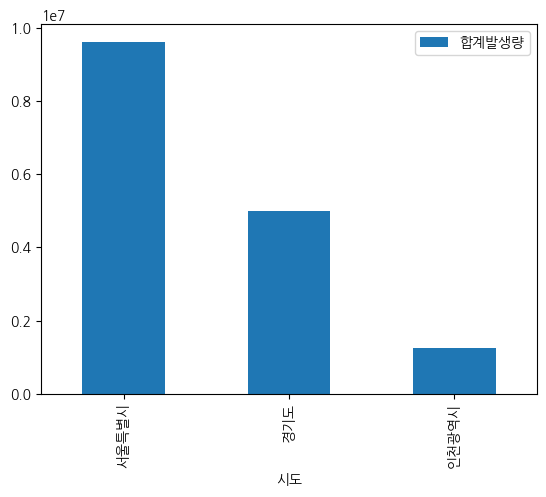

In [66]:
plt.figure(figsize=(8,6))
sido_use_pivot.plot(kind="bar")
plt.show()

## 서울에서 하루평균 100만번을 탑승한다

In [67]:
use_pivot = pd.pivot_table(raw_data, index="시군구",values="합계발생량", aggfunc='sum').sort_values(by="합계발생량", ascending=False)
use_pivot /=2250

## 대중교통 이용 시군구 순위 top 10

<Figure size 800x600 with 0 Axes>

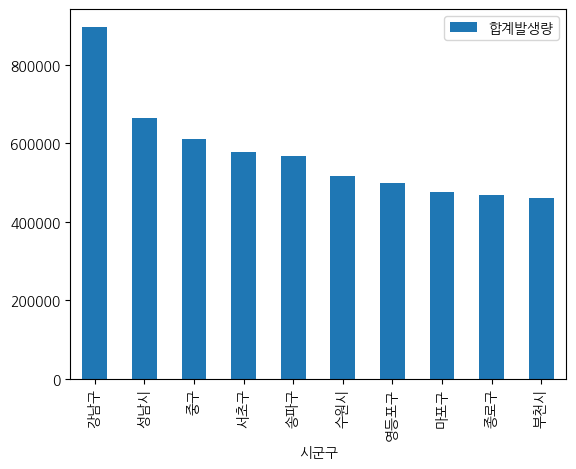

In [68]:
plt.figure(figsize=(8,6))
use_pivot.head(10).plot(kind="bar")
plt.show()

## 가장 적게 탑승하는 시군구 top 10
### 강남구와 가평군은 100배정도 차이난다

<Figure size 800x600 with 0 Axes>

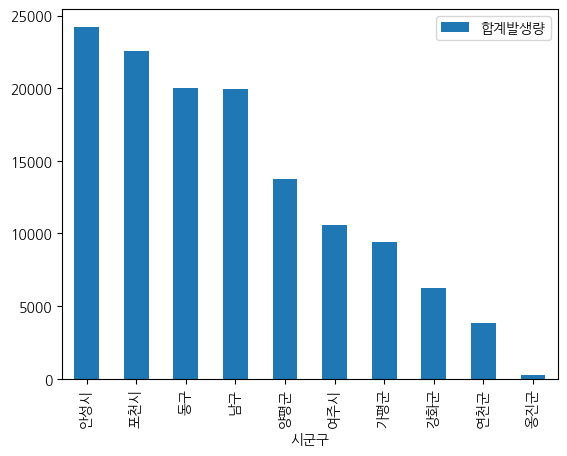

In [69]:
plt.figure(figsize=(8,6))
use_pivot.tail(10).plot(kind="bar")
plt.show()

## 사람들이 내리는 양

In [70]:
drop_pivot = pd.pivot_table(raw_data, index="시군구",values="합계도착량", aggfunc='sum').sort_values(by="합계도착량", ascending=False)
drop_pivot /=2250

<Figure size 800x600 with 0 Axes>

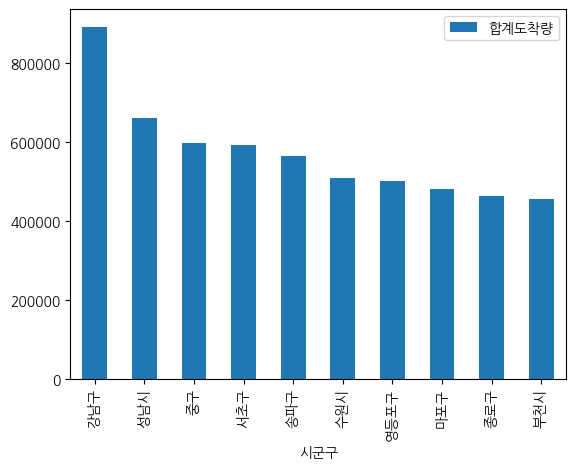

In [71]:
plt.figure(figsize=(8,6))
drop_pivot.head(10).plot(kind="bar")
plt.show()

<Figure size 800x600 with 0 Axes>

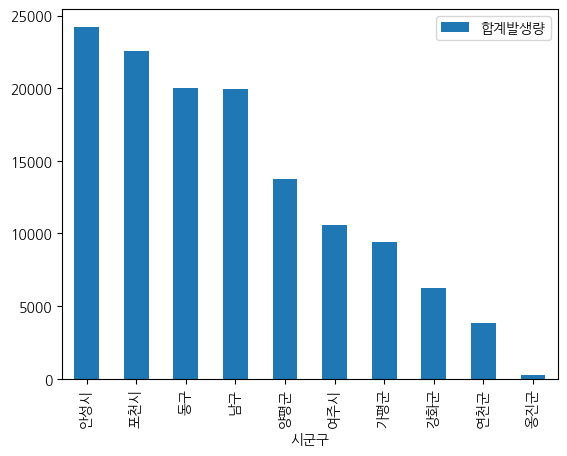

In [72]:
plt.figure(figsize=(8,6))
use_pivot.tail(10).plot(kind="bar")
plt.show()

## 타는양과 내리는 양은 순위 변동이 거의 없다 (있긴 있다)

In [73]:
cursor.execute("""select 연월, sum(합계발생량) as 합계발생량 from method_traffic where 시도="서울특별시" group by 연월""")
seoul_use_by_date = pd.DataFrame(cursor.fetchall())

In [74]:
cursor.execute("""select 연월, sum(합계발생량) as 합계발생량 from method_traffic where 시도="경기도" group by 연월""")
gyunggi_use_by_date = pd.DataFrame(cursor.fetchall())

In [75]:
cursor.execute("""select 연월, sum(합계발생량) as 합계발생량 from method_traffic where 시도="인천광역시" group by 연월""")
incheon_use_by_date = pd.DataFrame(cursor.fetchall())

## 서울,경기도,인천의 대중교통 월별 이용수

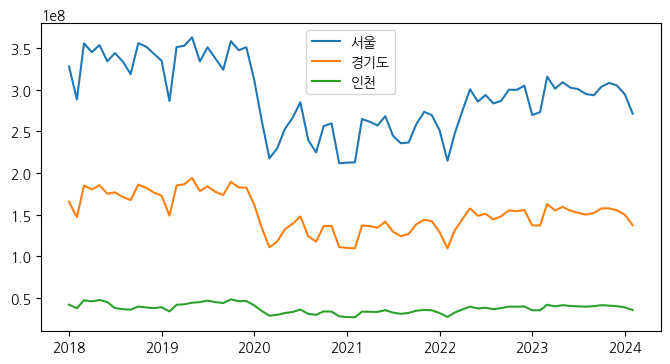

In [76]:
from datetime import datetime
plt.figure(figsize=(8,4))
plt.plot(pd.to_datetime(seoul_use_by_date["연월"],format="%Y%m"), seoul_use_by_date["합계발생량"], label="서울")
plt.plot(pd.to_datetime(gyunggi_use_by_date["연월"],format="%Y%m"), gyunggi_use_by_date["합계발생량"], label="경기도")
plt.plot(pd.to_datetime(incheon_use_by_date["연월"],format="%Y%m"), incheon_use_by_date["합계발생량"], label="인천")
plt.legend()
plt.show()


## 서울, 경기도, 인천 순으로 이용수가 많고 연말,연초에 순간적으로 탑승량이 떨어진다

## 일반인 시간별 탑승량

In [77]:
sql="""select 교통수단, sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic where 이용자유형="일반인" group by 교통수단"""
cursor.execute(sql)
transp_way = pd.DataFrame(cursor.fetchall())

In [78]:
column_name=['교통수단']
for i in range(1,25):
    column_name.append(i)

In [79]:
transp_way.columns=column_name

In [80]:
transp_way = transp_way.set_index("교통수단", drop=True)

In [81]:
transp_way=transp_way.astype(int)

In [82]:
transp_way = transp_way.transpose()
transp_way = transp_way/2250            #총 집계 날짜인 2250으로 나눠준다

## 평균적으로 하루동안 일어나는 교통수단별 탑승량

<Figure size 1000x600 with 0 Axes>

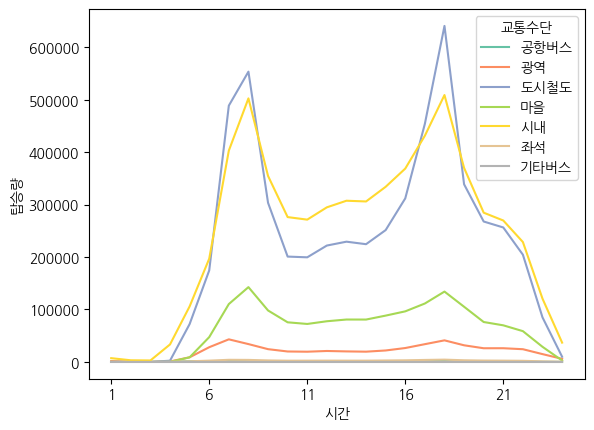

In [83]:
plt.figure(figsize=(10,6))
transp_way.plot(colormap='Set2')
plt.xlabel("시간")
plt.ylabel("탑승량")
plt.show()

## 주로 출퇴근시간에 많이 탑승객들이 몰려있다.
### 도시철도, 시내버스가 가장 많고 마을, 광역버스가 뒤따른다.
### 특히 도시철도는 시내버스에 비해 출퇴근 시간대에 많아지고 다른 시간대에 적어진다.
### 공항버스, 좌석, 기타버스는 다른 교통수단들에 비해 거의 없다.

In [84]:
sql="""select 이용자유형, sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic group by 이용자유형"""
cursor.execute(sql)
user_way = pd.DataFrame(cursor.fetchall())

In [85]:
column_name=['이용자유형']
for i in range(1,25):
    column_name.append(i)

In [86]:
user_way.columns=column_name
user_way = user_way.set_index("이용자유형", drop=True)
user_way=user_way.astype(int)
user_way = user_way.transpose()
user_way /=2250

# 이용자 유형별 대중교통 탑승량

<Figure size 1000x600 with 0 Axes>

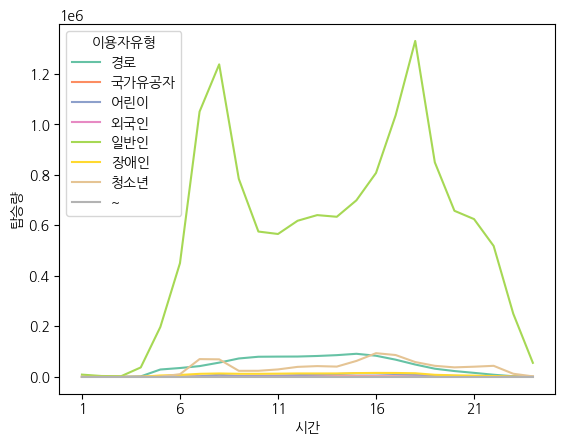

In [87]:
plt.figure(figsize=(10,6))
user_way.plot(colormap='Set2')
plt.xlabel("시간")
plt.ylabel("탑승량")
plt.show()

## 일반인이 가장 많고 출퇴근 시간에 이용이 두드러진다.

### 일반인을 제외하고 보면

<Figure size 1000x600 with 0 Axes>

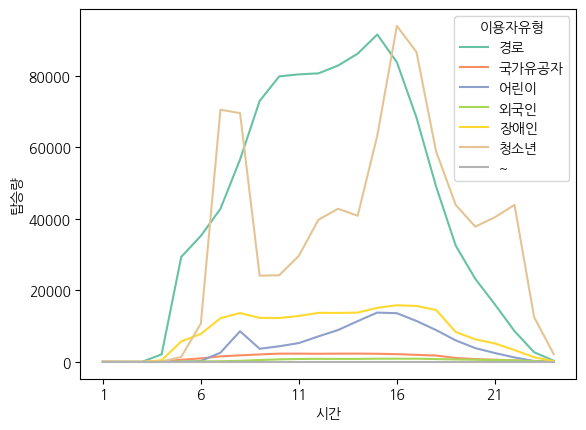

In [88]:
plt.figure(figsize=(10,6))
pd.concat([user_way.iloc[:,0:4],user_way.iloc[:,5:]], axis=1).plot(colormap='Set2')
plt.xlabel("시간")
plt.ylabel("탑승량")
plt.show()

## 출퇴근 시간에 청소년들이 많이 타고 나머지는 출퇴근 시간과 크게 관계없다.
### 출퇴근 시간 이외에는 경로가 가장 이용수가 많다
### 밤에 청소년 탑승이 늘어나는 시간대가 있다 (고등학교 야자때문인듯?)

In [89]:
user_way.sum(axis=0)

이용자유형
경로       1.026107e+06
국가유공자    3.014324e+04
어린이      1.140861e+05
외국인      1.143164e+04
일반인      1.364354e+07
장애인      2.045457e+05
청소년      8.382815e+05
~        3.422222e-02
dtype: float64

#### 의외로 외국인보다 국가유공자 탑승량이 많다

## 탑승시간과 도착시간의 간격을 알아보자

In [90]:
sql = """select 시도, sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic group by 시도"""
cursor.execute(sql)
sido_leave=pd.DataFrame(cursor.fetchall())

In [91]:
sql = """select 시도, sum(1시도착량),sum(2시도착량),sum(3시도착량), sum(4시도착량),sum(5시도착량),sum(5시도착량),sum(6시도착량),sum(7시도착량),sum(8시도착량),sum(9시도착량),sum(10시도착량),sum(11시도착량),sum(12시도착량),sum(13시도착량),sum(14시도착량),sum(15시도착량),sum(16시도착량),sum(17시도착량),sum(18시도착량),sum(19시도착량),sum(20시도착량),sum(21시도착량),sum(22시도착량),sum(23시도착량),sum(24시도착량) from method_traffic group by 시도"""
cursor.execute(sql)
sido_arrive=pd.DataFrame(cursor.fetchall())

In [92]:
sql = """select sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic"""
cursor.execute(sql)
leave_time=pd.DataFrame(cursor.fetchall())
sql = """select sum(1시도착량),sum(2시도착량),sum(3시도착량), sum(4시도착량),sum(5시도착량),sum(5시도착량),sum(6시도착량),sum(7시도착량),sum(8시도착량),sum(9시도착량),sum(10시도착량),sum(11시도착량),sum(12시도착량),sum(13시도착량),sum(14시도착량),sum(15시도착량),sum(16시도착량),sum(17시도착량),sum(18시도착량),sum(19시도착량),sum(20시도착량),sum(21시도착량),sum(22시도착량),sum(23시도착량),sum(24시도착량) from method_traffic"""
cursor.execute(sql)
arrive_time=pd.DataFrame(cursor.fetchall())

In [93]:
column_name=[]
for i in range(1,25):
    column_name.append(i)
leave_time.columns=column_name
leave_time=leave_time.astype(int)
leave_time = leave_time.transpose()

arrive_time.columns=column_name
arrive_time=arrive_time.astype(int)
arrive_time = arrive_time.transpose()

## 탑승시간과 도착시간의 관계

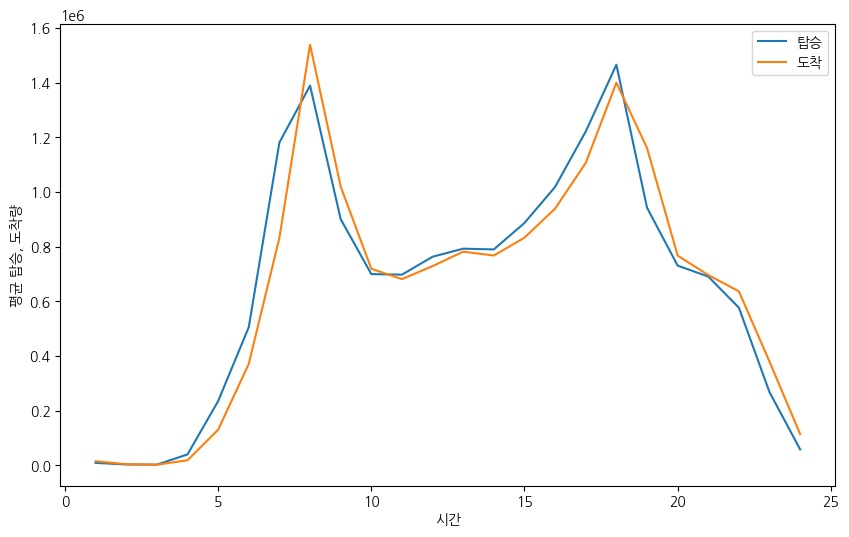

In [94]:
plt.figure(figsize=(10,6))
plt.plot(leave_time/2250, label="탑승")
plt.plot(arrive_time/2250, label="도착")
plt.xlabel("시간")
plt.ylabel("평균 탑승, 도착량")
plt.legend()
plt.show()

## 도착시간은 탑승시간보다 30분정도 늦는다
## 따라서 이동시간이 약 30분정도 되는것 같다

In [99]:
sql = """select sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic where 시도='서울특별시'"""
cursor.execute(sql)
seoul_time=pd.DataFrame(cursor.fetchall())

seoul_time.columns=column_name
seoul_time=seoul_time.astype(int)
seoul_time = seoul_time.transpose()

In [102]:
sql = """select sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic where 시도='경기도'"""
cursor.execute(sql)
gyunggi=pd.DataFrame(cursor.fetchall())

gyunggi.columns=column_name
gyunggi=gyunggi.astype(int)
gyunggi = gyunggi.transpose()

In [103]:
sql = """select sum(1시발생량),sum(2시발생량),sum(3시발생량), sum(4시발생량),sum(5시발생량),sum(5시발생량),sum(6시발생량),sum(7시발생량),sum(8시발생량),sum(9시발생량),sum(10시발생량),sum(11시발생량),sum(12시발생량),sum(13시발생량),sum(14시발생량),sum(15시발생량),sum(16시발생량),sum(17시발생량),sum(18시발생량),sum(19시발생량),sum(20시발생량),sum(21시발생량),sum(22시발생량),sum(23시발생량),sum(24시발생량) from method_traffic where 시도='인천광역시'"""
cursor.execute(sql)
incheon=pd.DataFrame(cursor.fetchall())

incheon.columns=column_name
incheon=incheon.astype(int)
incheon = incheon.transpose()

## 서울, 경기, 인천의 시간별 이용량

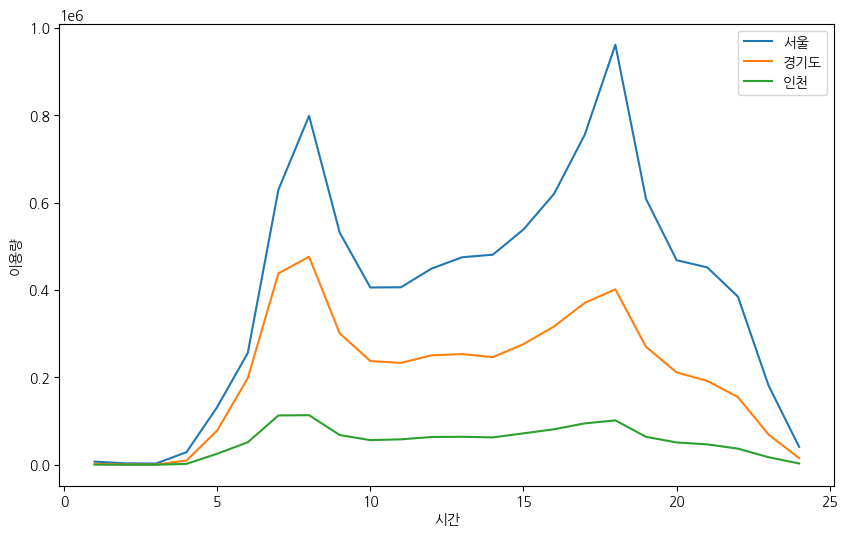

In [105]:
plt.figure(figsize=(10,6))
plt.plot(seoul_time/2250, label="서울")
plt.plot(gyunggi/2250, label="경기도")
plt.plot(incheon/2250, label="인천")
plt.xlabel("시간")
plt.ylabel("이용량")
plt.legend()
plt.show()